In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Set display options
pd.set_option('display.max_rows', None)

In [20]:
#Getting the Swiss Roll dataset
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [21]:
#Printing the shape
print(X.shape, t.shape)

(1000, 3) (1000,)


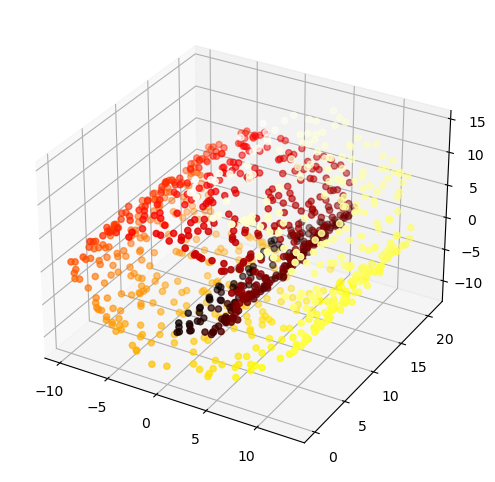

In [22]:
#Plotting the Swiss Roll dataset
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap=plt.cm.hot)
plt.show()

In [23]:
#Applying the Kernel PCA with linear kernel
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
X_reduced_lin = lin_pca.fit_transform(X)

In [24]:
#Applying the Kernel PCA with the RBF kernel
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
X_reduced_rbf = rbf_pca.fit_transform(X)

In [25]:
#Applying the Kernel PCA with the Sigmoid kernel
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)
X_reduced_sig = sig_pca.fit_transform(X)

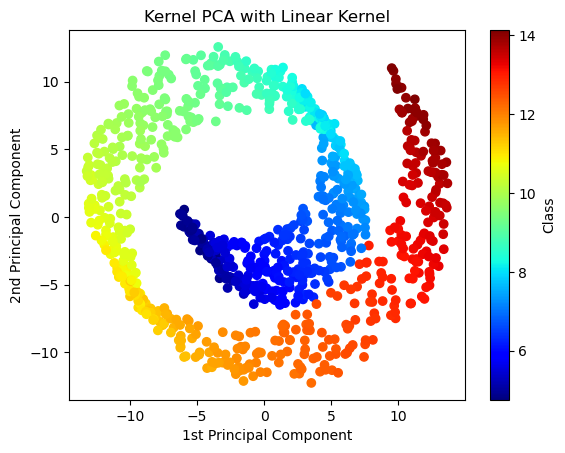

In [26]:
#Plotting the Kernel PCA with linear kernel
plt.scatter(X_reduced_lin[:, 0], X_reduced_lin[:, 1], c=t, cmap='jet')
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("Kernel PCA with Linear Kernel")
plt.colorbar(label="Class")

plt.show()

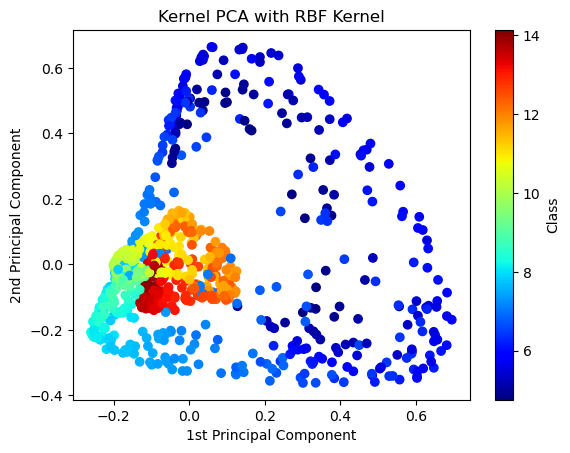

In [27]:
#Plotting the Kernel PCA with RBF kernel
plt.scatter(X_reduced_rbf[:, 0], X_reduced_rbf[:, 1], c=t, cmap='jet')
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("Kernel PCA with RBF Kernel")
plt.colorbar(label="Class")

plt.show()

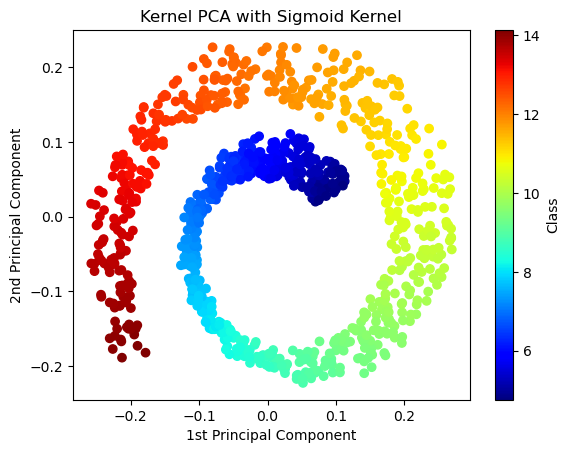

In [28]:
#Plotting the Kernel PCA with Sigmoid kernel
plt.scatter(X_reduced_sig[:, 0], X_reduced_sig[:, 1], c=t, cmap='jet')
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("Kernel PCA with Sigmoid Kernel")
plt.colorbar(label="Class")

plt.show()

In [29]:
#Applying Logistic Regression to the Kernel PCA with linear kernel

y = t > 6.9

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["linear", "rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['linear', 'rbf', 'sigmoid']}])

In [30]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [31]:
print(grid_search.best_params_['kpca__gamma'])
print(grid_search.best_params_['kpca__kernel'])


0.043333333333333335
rbf


In [32]:
# Creating the model with the best parameters
rbf_pca_best = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca_best.fit_transform(X)
X_recovered = rbf_pca_best.inverse_transform(X_reduced)

In [ ]:
#mean_squared_error(X, X_recovered)

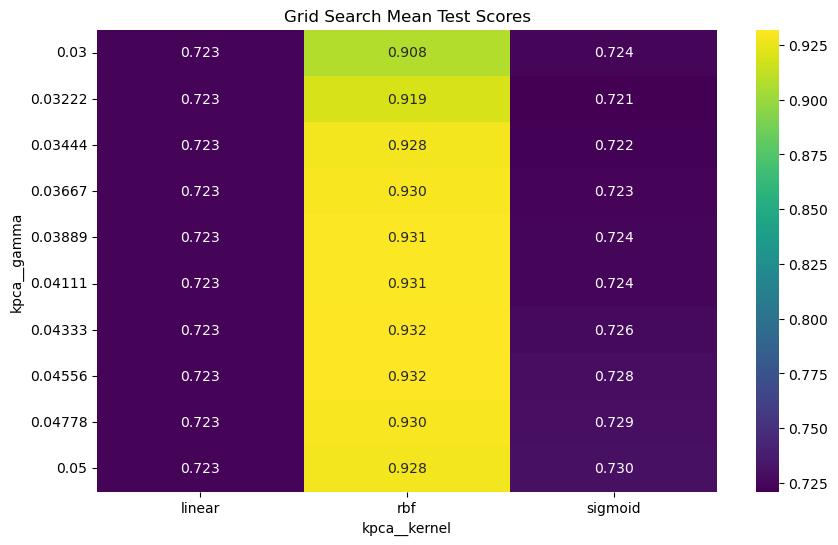

In [33]:
# Extracting scores from grid_search
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
scores = mean_scores.reshape(len(param_grid[0]['kpca__gamma']), len(param_grid[0]['kpca__kernel']))

# Plotting the scores using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, fmt=".3f", cmap='viridis', 
            xticklabels=param_grid[0]['kpca__kernel'], 
            yticklabels=np.around(param_grid[0]['kpca__gamma'], 5))
plt.xlabel('kpca__kernel')
plt.ylabel('kpca__gamma')
plt.title('Grid Search Mean Test Scores')
plt.show()
